In [1]:
from transformers import GPT2Model, GPT2Tokenizer
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/anthonyhsu/Documents/GitHub/BlackHoleVector/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "gpt2"
model = GPT2Model.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

In [3]:
text = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    embeddings = model.get_input_embeddings()(inputs['input_ids'])

embedding_matrix = embeddings.squeeze(0).cpu().numpy()
correlation_matrix = np.corrcoef(embedding_matrix, rowvar=True)

In [4]:
correlation_matrix.shape

(10, 10)

In [5]:
correlation_df = pd.DataFrame(correlation_matrix, 
                              index=[tokenizer.decode(id) for id in inputs['input_ids'][0]],
                              columns=[tokenizer.decode(id) for id in inputs['input_ids'][0]])

In [6]:
print(correlation_df)

             The     quick     brown       fox     jumps      over       the  \
The     1.000000  0.291290  0.261671  0.233437  0.223184  0.376798  0.650730   
 quick  0.291290  1.000000  0.276869  0.217481  0.305936  0.228370  0.219448   
 brown  0.261671  0.276869  1.000000  0.314216  0.190067  0.203661  0.163154   
 fox    0.233437  0.217481  0.314216  1.000000  0.268525  0.143713  0.087000   
 jumps  0.223184  0.305936  0.190067  0.268525  1.000000  0.191371  0.086593   
 over   0.376798  0.228370  0.203661  0.143713  0.191371  1.000000  0.409693   
 the    0.650730  0.219448  0.163154  0.087000  0.086593  0.409693  1.000000   
 lazy   0.242852  0.364269  0.322686  0.314303  0.274671  0.181691  0.102938   
 dog    0.274712  0.224933  0.286953  0.436295  0.247921  0.219788  0.187317   
.       0.470309  0.225556  0.181010  0.109287  0.149779  0.394458  0.533768   

            lazy       dog         .  
The     0.242852  0.274712  0.470309  
 quick  0.364269  0.224933  0.225556  
 b

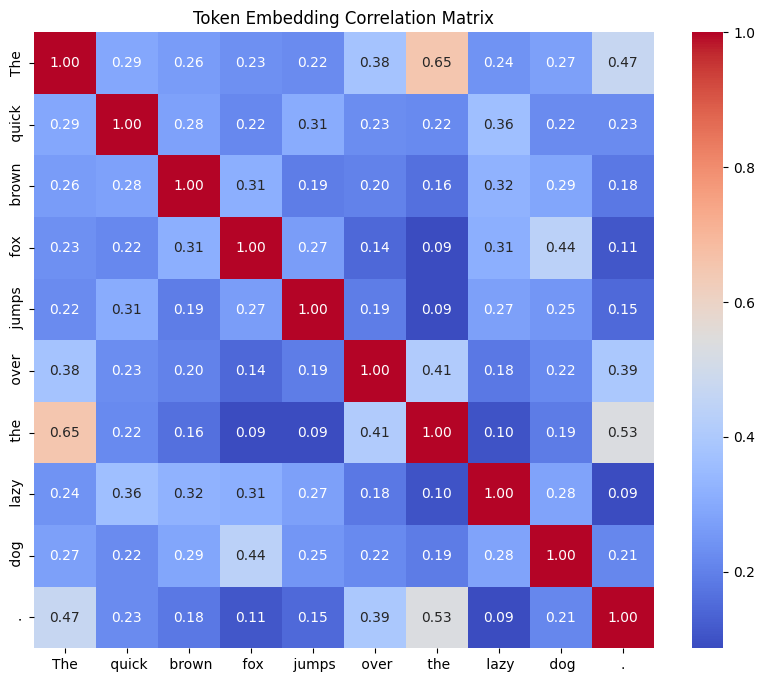

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Token Embedding Correlation Matrix")
plt.show()

             One       Dog         ,       two      Dogs         ,      lazy  \
The     0.620971  0.258949  0.452416  0.427689  0.249779  0.452416  0.242852   
 quick  0.288753  0.171322  0.186379  0.257520  0.167720  0.186379  0.364269   
 brown  0.265655  0.225009  0.152545  0.249586  0.219967  0.152545  0.322686   
 fox    0.263726  0.366942  0.070450  0.163641  0.390583  0.070450  0.314303   
 jumps  0.259421  0.235568  0.123864  0.151980  0.249368  0.123864  0.274671   
 over   0.257422  0.164882  0.391444  0.350055  0.133646  0.391444  0.181691   
 the    0.256348  0.141068  0.564530  0.489979  0.089474  0.564530  0.102938   
 lazy   0.268227  0.233496  0.053014  0.209022  0.250873  0.053014  1.000000   
 dog    0.252074  0.733669  0.194718  0.260570  0.635313  0.194718  0.279604   
.       0.304390  0.160245  0.859310  0.363043  0.110567  0.859310  0.089937   

            dogs         ,     happy      dogs         ,         I        am  \
The     0.253109  0.452416  0.296493  0

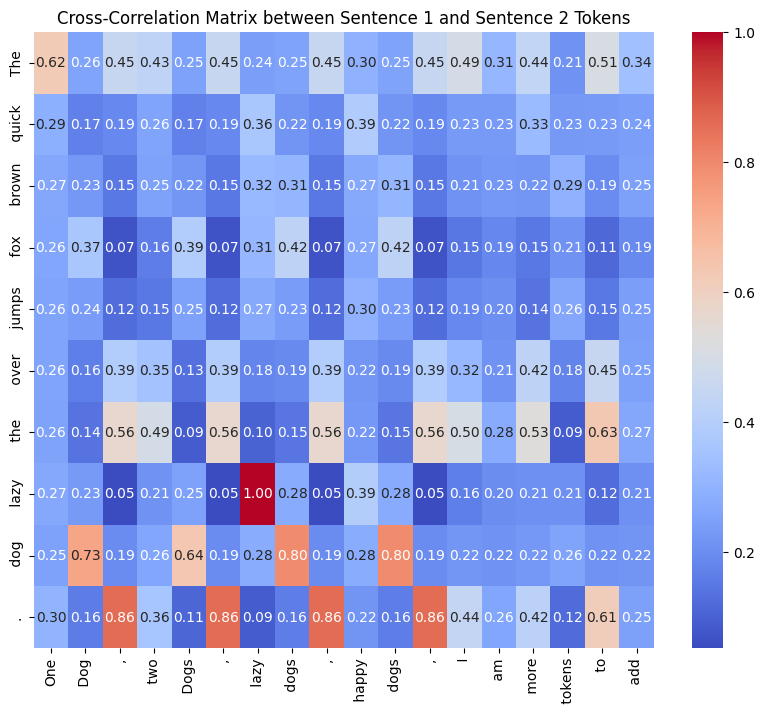

In [8]:
from transformers import GPT2Model, GPT2Tokenizer
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "gpt2"
model = GPT2Model.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

sentence_1 = "The quick brown fox jumps over the lazy dog."
sentence_2 = "One Dog, two Dogs, lazy dogs, happy dogs, I am more tokens to add"

inputs_1 = tokenizer(sentence_1, return_tensors="pt", truncation=True, max_length=512)
inputs_2 = tokenizer(sentence_2, return_tensors="pt", truncation=True, max_length=512)

with torch.no_grad():
    embeddings_1 = model.get_input_embeddings()(inputs_1['input_ids']).squeeze(0)
    embeddings_2 = model.get_input_embeddings()(inputs_2['input_ids']).squeeze(0) 

embedding_matrix_1 = embeddings_1.cpu().numpy()
embedding_matrix_2 = embeddings_2.cpu().numpy()

cross_correlation_matrix = np.corrcoef(embedding_matrix_1, embedding_matrix_2, rowvar=True)

tokens_1 = [tokenizer.decode(id) for id in inputs_1['input_ids'][0]]
tokens_2 = [tokenizer.decode(id) for id in inputs_2['input_ids'][0]]

cross_correlation = cross_correlation_matrix[:len(tokens_1), len(tokens_1):]

cross_correlation_df = pd.DataFrame(cross_correlation, index=tokens_1, columns=tokens_2)


print(cross_correlation_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cross_correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cross-Correlation Matrix between Sentence 1 and Sentence 2 Tokens")
plt.show()


In [9]:
with open("./short_1.txt", "r") as file:
    text = file.read()

In [10]:

inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)


with torch.no_grad():
    embeddings = model.get_input_embeddings()(inputs['input_ids'])

In [11]:
embedding_matrix = embeddings.squeeze(0).cpu().numpy()
correlation_matrix = np.corrcoef(embedding_matrix, rowvar=True)
tokens = [tokenizer.decode(id) for id in inputs['input_ids'][0]]
correlation_df = pd.DataFrame(correlation_matrix, index=tokens, columns=tokens)

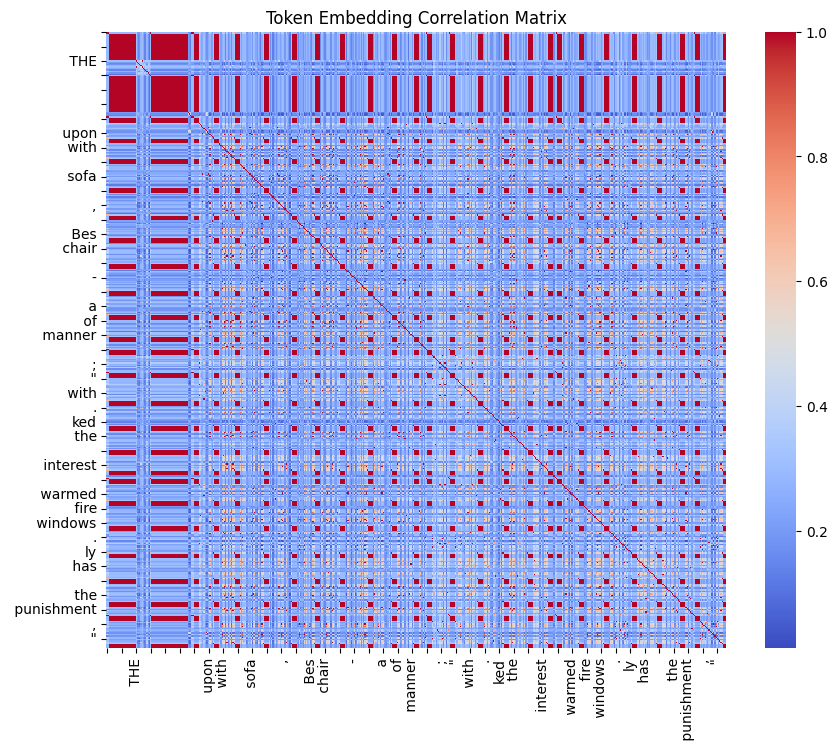

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=False, cmap="coolwarm")
plt.title("Token Embedding Correlation Matrix")
plt.show()

In [21]:
with open("./short_1.txt", "r") as file:
    text_1 = file.read()

with open("./short_2.txt", "r") as file:
    text_2 = file.read()

text_1 = " ".join(text_1.split())
text_2 = " ".join(text_2.split())

inputs_1 = tokenizer(text_1, return_tensors="pt", truncation=True, max_length=100)
inputs_2 = tokenizer(text_2, return_tensors="pt", truncation=True, max_length=100)

with torch.no_grad():
    embeddings_1 = model.get_input_embeddings()(inputs_1['input_ids']).squeeze(0)
    embeddings_2 = model.get_input_embeddings()(inputs_2['input_ids']).squeeze(0) 

embedding_matrix_1 = embeddings_1.cpu().numpy()
embedding_matrix_2 = embeddings_2.cpu().numpy()

cross_correlation_matrix = np.corrcoef(embedding_matrix_1, embedding_matrix_2, rowvar=True)

tokens_1 = [tokenizer.decode(id) for id in inputs_1['input_ids'][0]]
tokens_2 = [tokenizer.decode(id) for id in inputs_2['input_ids'][0]]

cross_correlation = cross_correlation_matrix[:len(tokens_1), len(tokens_1):]

cross_correlation_df = pd.DataFrame(cross_correlation, index=tokens_1, columns=tokens_2)


print(cross_correlation_df)


             THE       ADV       ENT       URE        OF       THE       ENG  \
THE     1.000000  0.320600  0.375528  0.364337  0.443231  0.724238  0.322662   
 ADV    0.320600  1.000000  0.313308  0.306725  0.351245  0.370974  0.417156   
ENT     0.375528  0.313308  1.000000  0.348836  0.322296  0.348768  0.339362   
URE     0.364337  0.306725  0.348836  1.000000  0.368824  0.333226  0.295346   
 OF     0.443231  0.351245  0.322296  0.368824  1.000000  0.528305  0.341133   
...          ...       ...       ...       ...       ...       ...       ...   
,       0.099810  0.098455  0.117671  0.068263  0.180296  0.232504  0.093352   
 and    0.118172  0.100030  0.108503  0.083160  0.193287  0.237220  0.076577   
 on     0.155056  0.125949  0.165655  0.118413  0.223656  0.269388  0.111755   
 the    0.210250  0.095179  0.091801  0.066832  0.199643  0.433751  0.079351   
 angle  0.259313  0.240517  0.182173  0.212183  0.275918  0.237804  0.242897   

             INE        ER         '  .

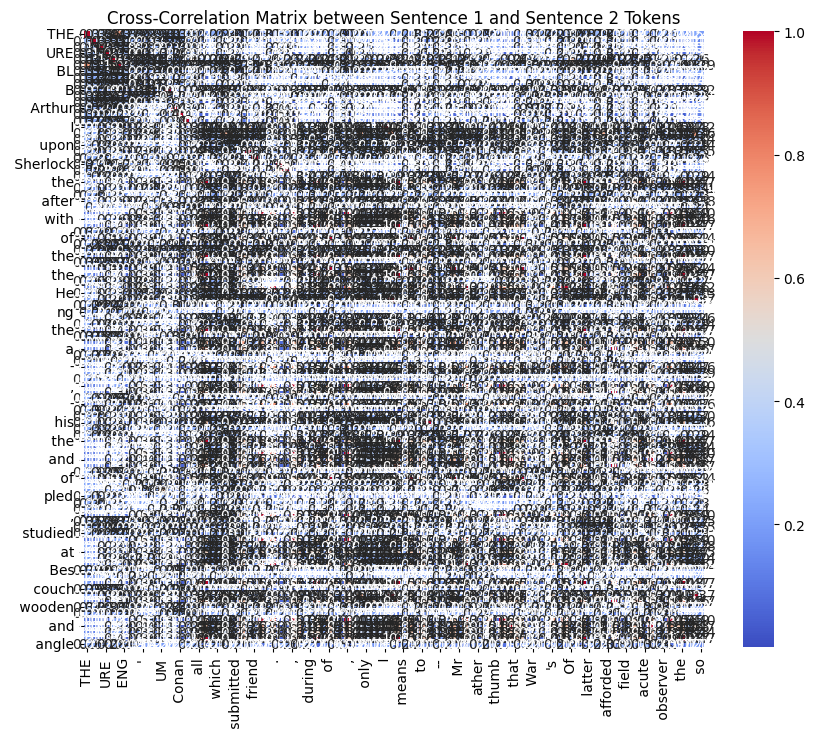

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(cross_correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cross-Correlation Matrix between Sentence 1 and Sentence 2 Tokens")
plt.show()